In [10]:
#importing libraries

import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
import warnings 
warnings.filterwarnings('ignore')


In [11]:
#initialize the convolutional neural network
classifier = Sequential()

In [12]:
#step 1 convolution
classifier.add(Convolution2D(32,3,3,input_shape = (64,64,3),activation = 'relu'))

#step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

#second layer
classifier.add(Convolution2D(32,3,3,activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

#step 3 - Flattening
classifier.add(Flatten())

#step 4 - Full Connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))



In [13]:
#compiling the cnn
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('Downloads/cell_images/train',
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode = 'binary')


Found 22046 images belonging to 2 classes.


In [16]:
test_set = train_datagen.flow_from_directory('Downloads/cell_images/valid',
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 5512 images belonging to 2 classes.


In [17]:
classifier.fit_generator(training_set,
                        samples_per_epoch = 8000,
                        nb_epoch = 25,
                        validation_data = test_set,
                        nb_val_samples = 2000)

Epoch 1/25
250/250 [==============================] - 177s 710ms/step - loss: 0.6868 - acc: 0.5402 - val_loss: 0.7222 - val_acc: 0.5092
Epoch 2/25
250/250 [==============================] - 176s 706ms/step - loss: 0.6672 - acc: 0.5865 - val_loss: 0.7502 - val_acc: 0.5034
Epoch 3/25
250/250 [==============================] - 173s 690ms/step - loss: 0.6319 - acc: 0.6440 - val_loss: 0.6969 - val_acc: 0.5436
Epoch 4/25
250/250 [==============================] - 172s 689ms/step - loss: 0.5365 - acc: 0.7324 - val_loss: 0.4351 - val_acc: 0.8096
Epoch 5/25
250/250 [==============================] - 167s 669ms/step - loss: 0.3648 - acc: 0.8467 - val_loss: 0.2484 - val_acc: 0.9034
Epoch 6/25
250/250 [==============================] - 174s 697ms/step - loss: 0.2536 - acc: 0.9042 - val_loss: 0.2314 - val_acc: 0.9163
Epoch 7/25
250/250 [==============================] - 173s 691ms/step - loss: 0.2198 - acc: 0.9210 - val_loss: 0.2125 - val_acc: 0.9213
Epoch 8/25
250/250 [============================

In [18]:
test_image1 = image.load_img('Downloads/cell_images/random1.png',target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)
if result[0][0] >= 0.5:
    prediction = 'Not infected'
else :
    prediction = 'infected'
print(prediction)
import matplotlib.pyplot as plt
plt.imshow(test_image1)

Not infected


infected


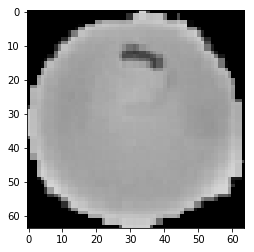

In [19]:
test_image1 = image.load_img('Downloads/cell_images/random2.png',target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)
if result[0][0] >= 0.5:
    prediction = 'Not infected'
else :
    prediction = 'infected'
print(prediction)
import matplotlib.pyplot as plt
plt.imshow(test_image1)

Not infected


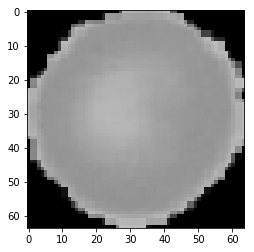

In [20]:
test_image1 = image.load_img('Downloads/cell_images/random3.png',target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)
if result[0][0] >= 0.5:
    prediction = 'Not infected'
else :
    prediction = 'infected'
print(prediction)
import matplotlib.pyplot as plt
plt.imshow(test_image1)